<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/estudo-dados-eleicoes/blob/master/PieRRestudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import seaborn as sns
import random
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
arraio = list(map(lambda x : random.randint(0,100),range(100)))

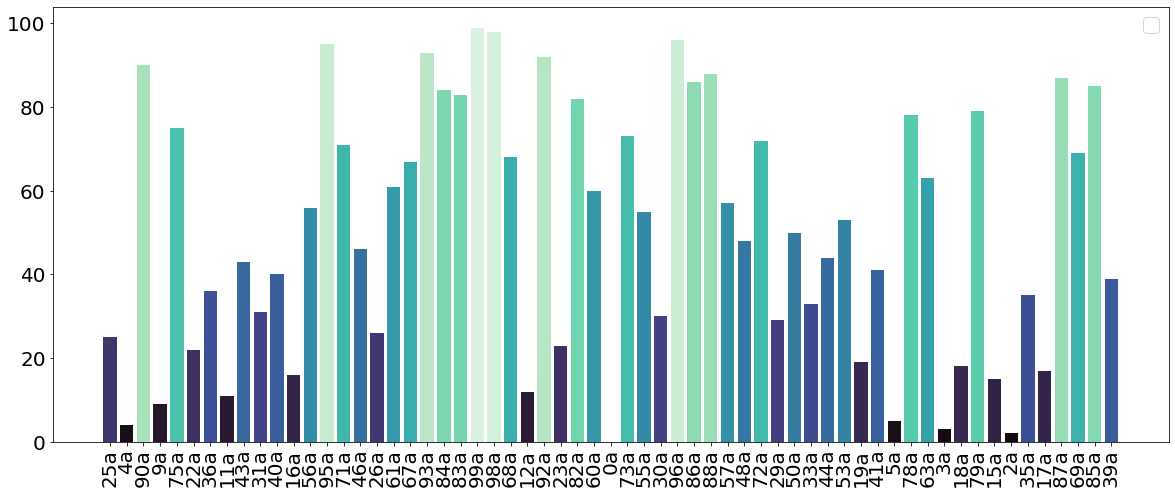

In [90]:
fig, ax = plt.subplots()

colors = sns.color_palette('mako',len(arraio))
arraiostr = list(map(lambda x : str(x) + 'a', arraio))
bar_colors = list(map(lambda num : colors[num],arraio))

ax.bar(arraiostr, arraio, color = bar_colors)
fig.set_size_inches(20,8)
ax.legend()
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation = 90)
plt.show()

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/dados eleições/votacao_partido_munzona_2020_BRASIL.csv',sep=";",encoding='latin-1')

In [ ]:
dados.head()

In [20]:
queryPrimeiroTurno = dados[
    (dados['NR_TURNO'] == 1)
    &(dados['DS_CARGO'] == 'Prefeito')
]
querySegundoTurno = dados[
    (dados['NR_TURNO'] == 2)
    &(dados['DS_CARGO'] == 'Prefeito')
]
queryPrimeiroTurno.shape,querySegundoTurno.shape

((23393, 28), (687, 28))

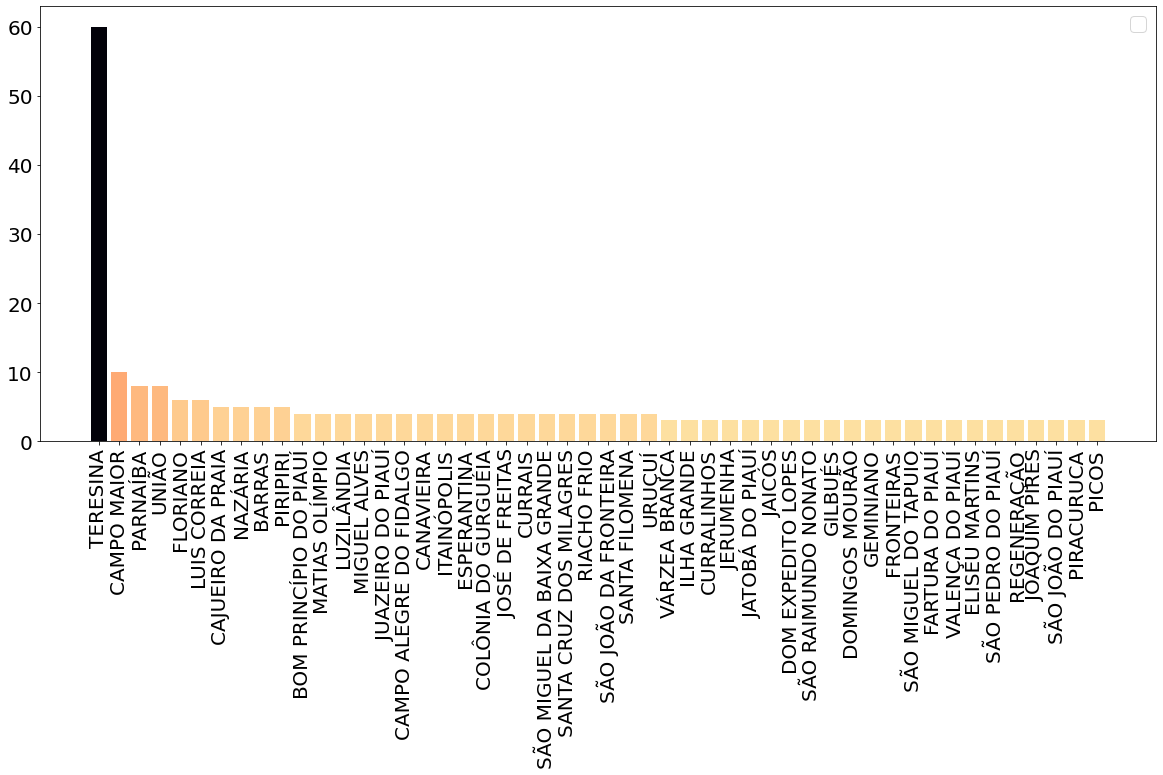

In [53]:
nm_urnas_primeiro_turno = queryPrimeiroTurno.groupby(by=['NM_MUNICIPIO']).agg(
    quantidade = ('DS_CARGO','count')
)

nm_urnas_primeiro_turno.sort_values('quantidade', inplace=True, ascending=False)



def showarQnt(data,color):
  fig, ax = plt.subplots()
  amostra = data['quantidade'].values[:50]
  colors = sns.color_palette(color,np.max(amostra+1))
  bar_colors = list(map(lambda num : colors[num],amostra))

  ax.bar( 
      data.index[:50], 
      data['quantidade'][:50],
      color=bar_colors[:50]
       )
  fig.set_size_inches(20,8)
  ax.legend()
  plt.rcParams.update({'font.size': 20})
  plt.xticks(rotation = 90)
  plt.show()

showarQnt(nm_urnas_primeiro_turno,'magma_r')

In [ ]:
queryPrimeiroTurno.drop(columns=
                        ['ANO_ELEICAO',
                         'DT_GERACAO',
                         'HH_GERACAO',
                         'CD_TIPO_ELEICAO',
                         'NM_TIPO_ELEICAO',
                         'NR_TURNO',
                         'CD_ELEICAO',
                         'DS_ELEICAO',
                         ])

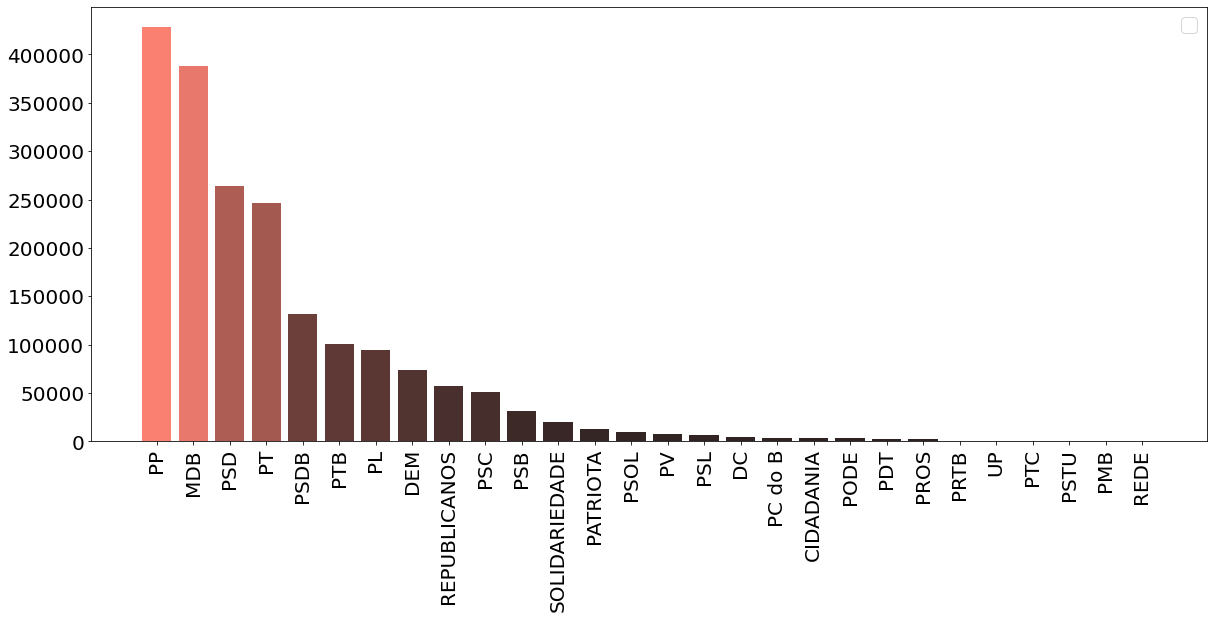

In [58]:
queryPrimeiroTurnoPI = dados[
    (dados['NR_TURNO'] == 1) & 
    (dados['DS_CARGO'] == 'Prefeito') &
    (dados['SG_UF'] == 'PI')
]

votosPorPartidoPI = queryPrimeiroTurnoPI[['SG_PARTIDO','QT_VOTOS_NOMINAIS','SG_UF']].groupby( by=['SG_PARTIDO'] ).agg(
    quantidade=( 'QT_VOTOS_NOMINAIS', 'sum')
)

votosPorPartidoPI.sort_values('quantidade', inplace=True, ascending=False)
showarQnt(votosPorPartidoPI,'dark:salmon')

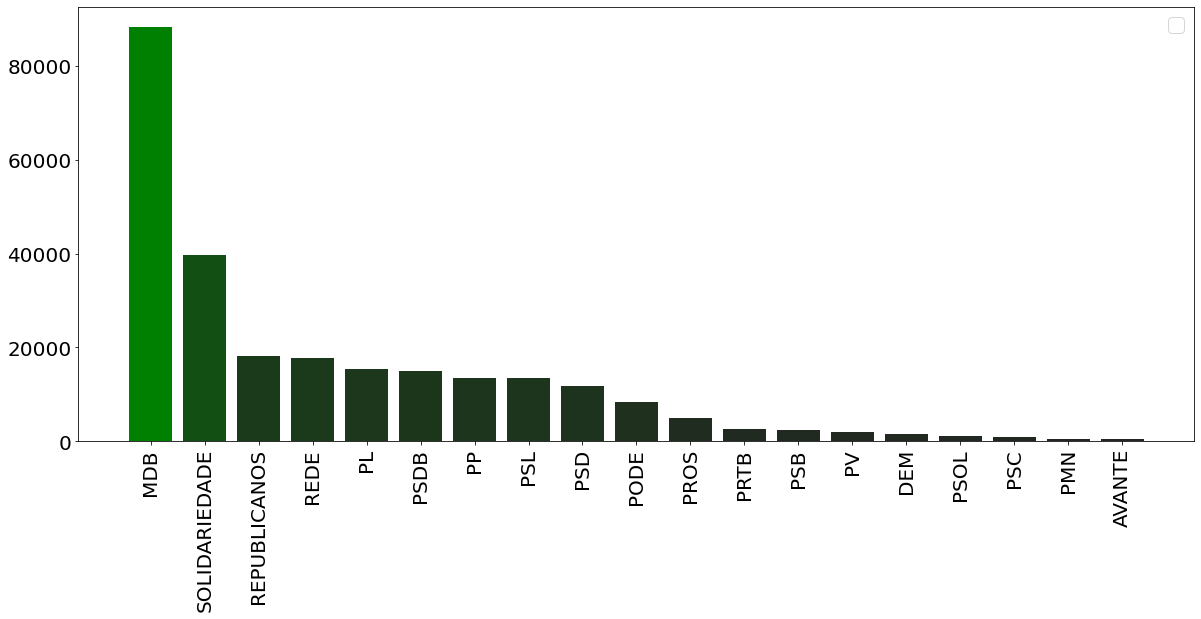

In [57]:
queryPrimeiroTurnoRR = dados[
    (dados['NR_TURNO'] == 1) & 
    (dados['DS_CARGO'] == 'Prefeito') &
    (dados['SG_UF'] == 'RR')
]

votosPorPartidoRR = queryPrimeiroTurnoRR[['SG_PARTIDO','QT_VOTOS_NOMINAIS','SG_UF']].groupby( by=['SG_PARTIDO'] ).agg(
    quantidade=( 'QT_VOTOS_NOMINAIS', 'sum')
)

votosPorPartidoRR.sort_values('quantidade', inplace=True, ascending=False)
showarQnt(votosPorPartidoRR,'dark:green')